# Satellite observation : CT (Cloud Types) images 

The aim of this notebook is to indicate how to read the satellite data of Cloud Types. It is about discrete values distributed over 20 classes (from 0 to 19). The missing value is 255.

The time step is 15 minutes, the spatial resolution, 3km. Each file contains for a time step the data for 1 geographic zone ('NW' for North-West of France or 'SE' for South-East of France).

In [1]:
from data_exploration.utils.user_configuration import CLOUD_TYPE, DOMAINS, n_epsg, path, CT_COLOR_MAP
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.basemap import Basemap, cm
import datetime as dt

In [8]:
zone = "SE"
day = dt.datetime(2016, 2, 1) # Day example 
fname = path + "satellite/CT_%s_%s.npz" % (zone, day.strftime('%Y%m%d%H%M'))
title = "CT (Cloud Types) - day %s - zone %s  " % (day.strftime('%Y%m%d%H%M'),
                                                   zone)

In [3]:
#coordinates of study zone boundaries
lllat = DOMAINS[zone]['lry']  #lower left latitude
urlat = DOMAINS[zone]['uly']  #upper right latitude
lllon = DOMAINS[zone]['ulx']  #lower left longitude
urlon = DOMAINS[zone]['lrx']  #upper right longitude

In [6]:
#data loading
def plot_cld_type(fname, title="No title"):
    import matplotlib.patches as mpatches
    d = np.load(fname, allow_pickle=True)
    d.files  #know the compressed file structure
    data = d['arr_0']
    print(data.shape)
    fig, ax = plt.subplots(1, 1, figsize=(10, 12))

    #background map definition : coordinates of corners, resolution, projection type
    m = Basemap(epsg=n_epsg,
                resolution='h',
                llcrnrlat=lllat,
                urcrnrlat=urlat,
                llcrnrlon=lllon,
                urcrnrlon=urlon)

    #colorbar definition
    cmap = colors.ListedColormap(CT_COLOR_MAP)
    bounds = [
        0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20
    ]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    # create a patch (proxy artist) for every color
    patches = [
        mpatches.Patch(color=CT_COLOR_MAP[i], label=CLOUD_TYPE[str(i)])
        for i in range(21)
    ]
    # put those patched as legend-handles into the legend
    plt.legend(handles=patches,
               loc=4,
               ncol=2,
               bbox_to_anchor=(0, -0.5, 0.8, 0.4))

    #plot the data and the background map (coastlines and borders)
    m.drawcoastlines()
    m.drawcountries()
    img = m.imshow(data,
                   interpolation='none',
                   origin='upper',
                   cmap=cmap,
                   norm=norm)
    plt.title(title)
    plt.show()

Overview of data of type uint8

(121, 185)


<IPython.core.display.Javascript object>


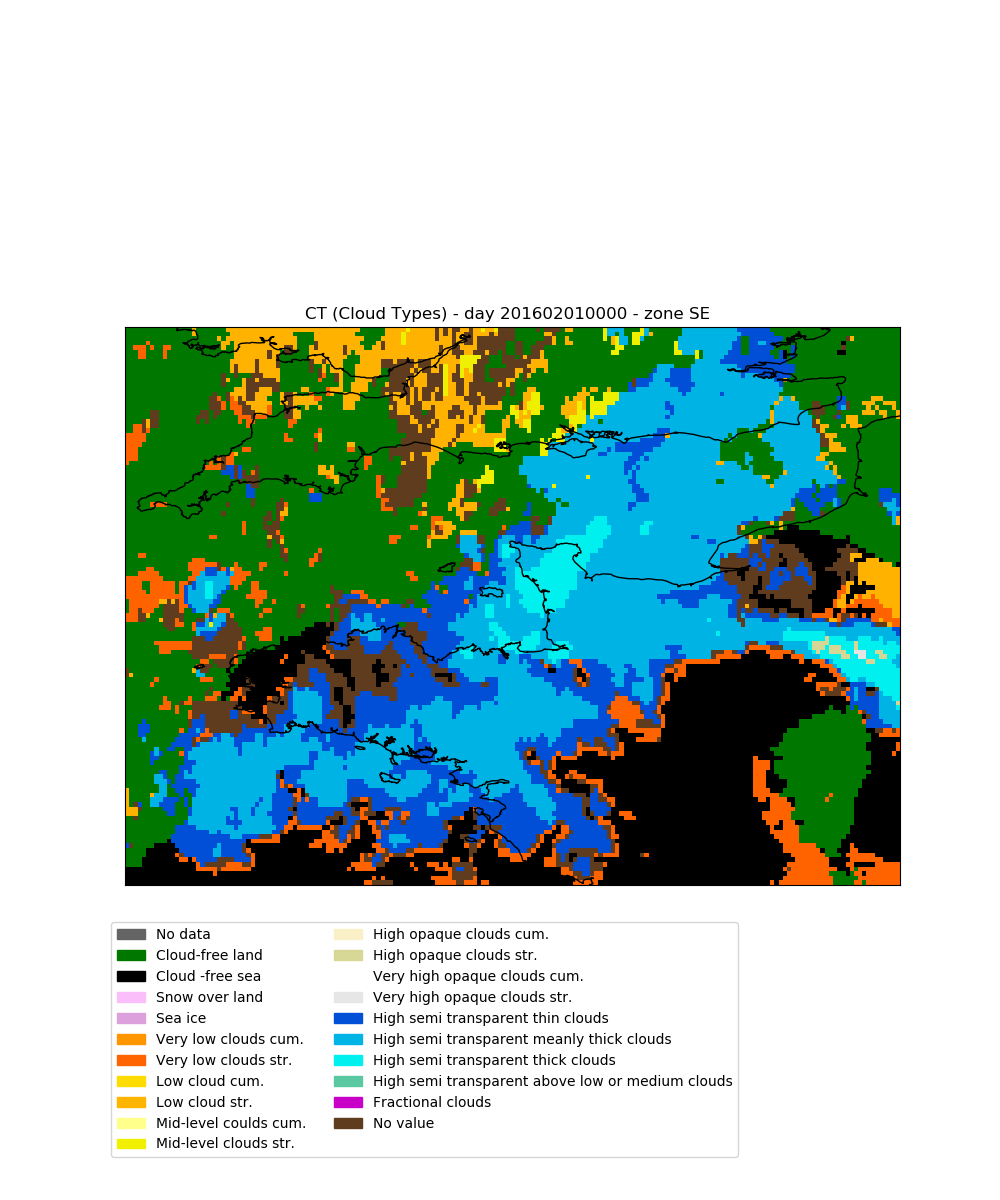

C:\Users\chabotv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()
C:\Users\chabotv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [9]:
plot_cld_type(fname,title)